# Split the prepped, released data for the model

In [20]:
# Import packages we need

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os,shutil

In [21]:
#load the release data
release_data = pd.read_csv('../data/tables/labelerdata/ReleaseData09072021.csv')

In [22]:
priority = release_data

In [23]:
list(priority.columns)

['Unnamed: 0',
 'userId',
 'storm_id',
 'image',
 'allWater',
 'devType',
 'washoverType',
 'dmgType',
 'impactType',
 'terrianType',
 'total',
 'LabelerArchive',
 'NOAA_flight']

In [24]:
priority.shape

(8087, 13)

In [25]:
priority.head()

,Unnamed: 0,userId,storm_id,image,allWater,devType,washoverType,dmgType,impactType,terrianType,total,LabelerArchive,NOAA_flight
0,0,1,florence,P26058806.jpg,True,undeveloped,noWashover,noDamage,NaN,NaN,100,Florence,florence/20180917a_jpgs
1,1,1,florence,P26057665.jpg,False,undeveloped,noWashover,noDamage,"swash,collision",sandyCoastline,100,Florence,florence/20180917a_jpgs
2,2,1,florence,P26059250.jpg,False,developed,washover,noDamage,"swash,collision,overwash",sandyCoastline,100,Florence,florence/20180917a_jpgs
3,3,1,florence,P26060067.jpg,False,undeveloped,noWashover,noDamage,"swash,collision",sandyCoastline,100,Florence,florence/20180917a_jpgs
4,4,1,florence,P26057539.jpg,False,undeveloped,washover,noDamage,"swash,collision,overwash",sandyCoastline,100,Florence,florence/20180917a_jpgs


In [26]:
#combine the storm name and archive into the flight tag
priority["Full_Image"] = priority["NOAA_flight"] + "/" + priority['image']


washData = priority[['Full_Image', 'userId', 'washoverType']]
priority = priority.replace({np.NaN: 'noWashover'})
washData.head()

,Full_Image,userId,washoverType
0,florence/20180917a_jpgs/P26058806.jpg,1,noWashover
1,florence/20180917a_jpgs/P26057665.jpg,1,noWashover
2,florence/20180917a_jpgs/P26059250.jpg,1,washover
3,florence/20180917a_jpgs/P26060067.jpg,1,noWashover
4,florence/20180917a_jpgs/P26057539.jpg,1,washover


In [27]:
washData.duplicated(subset=["Full_Image","userId"])

0       False
1       False
2       False
3       False
4       False
        ...  
8082    False
8083    False
8084    False
8085    False
8086    False
Length: 8087, dtype: bool

In [28]:
# pivot the wash data
washDataPivot = washData.pivot(index= 'Full_Image', columns='userId')
washDataPivot.head()

washoverType                                \
userId                                       1    2    3    4    5    6    7    
Full_Image                                                                      
barry/20190716a_jpgs/C19748971.jpg     washover  NaN  NaN  NaN  NaN  NaN  NaN   
barry/20190716a_jpgs/P19746920.jpg     washover  NaN  NaN  NaN  NaN  NaN  NaN   
barry/20190716a_jpgs/P19746926.jpg     washover  NaN  NaN  NaN  NaN  NaN  NaN   
barry/20190716a_jpgs/P19746929.jpg     washover  NaN  NaN  NaN  NaN  NaN  NaN   
barry/20190716a_jpgs/P19746935.jpg     washover  NaN  NaN  NaN  NaN  NaN  NaN   

                                                   ...                      \
userId                               8    9    10  ...   14   15   16   17   
Full_Image                                         ...                       
barry/20190716a_jpgs/C19748971.jpg  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
barry/20190716a_jpgs/P19746920.jpg  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
barry/20190716a_jpgs/P19746926.jpg  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
barry/20190716a_jpgs/P19746929.jpg  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
barry/20190716a_jpgs/P19746935.jpg  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   

                                                                  
userId                               18   19   20   21   22   23  
Full_Image                                                        
barry/20190716a_jpgs/C19748971.jpg  NaN  NaN  NaN  NaN  NaN  NaN  
barry/20190716a_jpgs/P19746920.jpg  NaN  NaN  NaN  NaN  NaN  NaN  
barry/20190716a_jpgs/P19746926.jpg  NaN  NaN  NaN  NaN  NaN  NaN  
barry/20190716a_jpgs/P19746929.jpg  NaN  NaN  NaN  NaN  NaN  NaN  
barry/20190716a_jpgs/P19746935.jpg  NaN  NaN  NaN  NaN  NaN  NaN  

[5 rows x 23 columns]

In [29]:
#save it to a file
washDataPivot.to_csv('../data/tables/labelerdata/Pivoted_Wash.csv')

### Now investigate the data

In [30]:
wash = pd.read_csv('../data/tables/labelerdata/Pivoted_Wash.csv', skiprows = 2)
#del wash ['Unnamed: 2']

#wash.head()

In [31]:
wash = wash.replace('noWashover', 0)
wash = wash.replace('washover', 1)
wash.head()

,Full_Image,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,barry/20190716a_jpgs/C19748971.jpg,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,barry/20190716a_jpgs/P19746920.jpg,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,barry/20190716a_jpgs/P19746926.jpg,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,barry/20190716a_jpgs/P19746929.jpg,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,barry/20190716a_jpgs/P19746935.jpg,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
#add a summary column to count washover votes
col_list= list(wash)
col_list.remove('Full_Image')
wash['wash_votes'] = wash[col_list].sum(axis=1)
wash["wash_votes"] = pd.to_numeric(wash["wash_votes"], errors='coerce')
wash.head()

#save to file
#wash.to_csv('../data/tables/washtally.csv')

,Full_Image,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,wash_votes
0,barry/20190716a_jpgs/C19748971.jpg,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,barry/20190716a_jpgs/P19746920.jpg,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,barry/20190716a_jpgs/P19746926.jpg,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,barry/20190716a_jpgs/P19746929.jpg,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,barry/20190716a_jpgs/P19746935.jpg,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [33]:
#extract just the vote data
washScores = wash[['Full_Image','wash_votes']]
washScores

,Full_Image,wash_votes
0,barry/20190716a_jpgs/C19748971.jpg,1.0
1,barry/20190716a_jpgs/P19746920.jpg,1.0
2,barry/20190716a_jpgs/P19746926.jpg,1.0
3,barry/20190716a_jpgs/P19746929.jpg,1.0
4,barry/20190716a_jpgs/P19746935.jpg,1.0
...,...,...
2745,zeta/20201030b_jpgs/S30482265.jpg,0.0
2746,zeta/20201030b_jpgs/S30482310.jpg,0.0
2747,zeta/20201030b_jpgs/S30482337.jpg,0.0
2748,zeta/20201030b_jpgs/S30482915.jpg,0.0


In [34]:
#join hashes and washScores
df = pd.read_csv('../data/tables/MasterDF_08262021_R6.csv')

# selecting rows based on bbeing labeled
L_df = df[df['labeled'].notnull()]

#Any Duplicates?, should be false via: 
#https://stackoverflow.com/questions/50242968/check-for-duplicate-values-in-pandas-dataframe-column

L_df.duplicated(subset=['image','storm_id']).any()

print(L_df.shape)

(3332, 20)


In [35]:
L_df.head()

,Filename,Prediction1,Prediction2,Prediction3,Prediction4,archive,image,date,labeled,ll_lat,ll_lon,lr_lat,lr_lon,size,storm_id,ul_lat,ul_lon,ur_lat,ur_lon,Prediction5
6,Barry/20190716a_jpgs/jpgs/C19748971.jpg,0.013530,0.411274,0.315693,0.505394,20190716a_jpgs,C19748971.jpg,2019/07/16,5.0,29.532414,-92.313437,29.529874,-92.301467,6734538,barry,29.540080,-92.311466,29.537953,-92.299447,0.182051
1027,Barry/20190716a_jpgs/jpgs/P19746920.jpg,0.631180,0.125718,0.930648,0.420183,20190716a_jpgs,P19746920.jpg,2019/07/16,6.0,29.697096,-93.818785,29.699831,-93.815273,4698985,barry,29.699903,-93.823397,29.704103,-93.817955,0.507434
1029,Barry/20190716a_jpgs/jpgs/P19746926.jpg,0.926416,0.341862,0.808487,0.519149,20190716a_jpgs,P19746926.jpg,2019/07/16,5.0,29.700794,-93.815834,29.703692,-93.812107,5064304,barry,29.704318,-93.822209,29.709575,-93.815407,0.679793
1030,Barry/20190716a_jpgs/jpgs/P19746929.jpg,0.916929,0.318669,0.598361,0.464885,20190716a_jpgs,P19746929.jpg,2019/07/16,5.0,29.702348,-93.813807,29.705077,-93.809986,5078525,barry,29.705950,-93.819703,29.710732,-93.812895,0.504528
1032,Barry/20190716a_jpgs/jpgs/P19746935.jpg,0.804317,0.207106,0.437543,0.391875,20190716a_jpgs,P19746935.jpg,2019/07/16,6.0,29.705153,-93.809517,29.707750,-93.805757,5046011,barry,29.708466,-93.814534,29.712736,-93.808317,0.501220


In [36]:
#combine the storm name and archive into the flight tag
L_df["Full_Image"] = L_df["storm_id"] + "/" + L_df['archive'] + "/" + L_df['image']

L_df.head()

<ipython-input-36-19377acf1a9d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  L_df["Full_Image"] = L_df["storm_id"] + "/" + L_df['archive'] + "/" + L_df['image']


,Filename,Prediction1,Prediction2,Prediction3,Prediction4,archive,image,date,labeled,ll_lat,...,lr_lat,lr_lon,size,storm_id,ul_lat,ul_lon,ur_lat,ur_lon,Prediction5,Full_Image
6,Barry/20190716a_jpgs/jpgs/C19748971.jpg,0.013530,0.411274,0.315693,0.505394,20190716a_jpgs,C19748971.jpg,2019/07/16,5.0,29.532414,...,29.529874,-92.301467,6734538,barry,29.540080,-92.311466,29.537953,-92.299447,0.182051,barry/20190716a_jpgs/C19748971.jpg
1027,Barry/20190716a_jpgs/jpgs/P19746920.jpg,0.631180,0.125718,0.930648,0.420183,20190716a_jpgs,P19746920.jpg,2019/07/16,6.0,29.697096,...,29.699831,-93.815273,4698985,barry,29.699903,-93.823397,29.704103,-93.817955,0.507434,barry/20190716a_jpgs/P19746920.jpg
1029,Barry/20190716a_jpgs/jpgs/P19746926.jpg,0.926416,0.341862,0.808487,0.519149,20190716a_jpgs,P19746926.jpg,2019/07/16,5.0,29.700794,...,29.703692,-93.812107,5064304,barry,29.704318,-93.822209,29.709575,-93.815407,0.679793,barry/20190716a_jpgs/P19746926.jpg
1030,Barry/20190716a_jpgs/jpgs/P19746929.jpg,0.916929,0.318669,0.598361,0.464885,20190716a_jpgs,P19746929.jpg,2019/07/16,5.0,29.702348,...,29.705077,-93.809986,5078525,barry,29.705950,-93.819703,29.710732,-93.812895,0.504528,barry/20190716a_jpgs/P19746929.jpg
1032,Barry/20190716a_jpgs/jpgs/P19746935.jpg,0.804317,0.207106,0.437543,0.391875,20190716a_jpgs,P19746935.jpg,2019/07/16,6.0,29.705153,...,29.707750,-93.805757,5046011,barry,29.708466,-93.814534,29.712736,-93.808317,0.501220,barry/20190716a_jpgs/P19746935.jpg


In [37]:
### Subset just the filename and the image
L_df = L_df[['Filename','Full_Image']]

#merge to WASH dataframe
joinedWash = pd.merge(washScores, L_df, on="Full_Image", how = "left")

#joinedWash= joinedWash.drop_duplicates()
#joinedWash.to_csv('../data/Test.csv')
joinedWash

,Full_Image,wash_votes,Filename
0,barry/20190716a_jpgs/C19748971.jpg,1.0,Barry/20190716a_jpgs/jpgs/C19748971.jpg
1,barry/20190716a_jpgs/P19746920.jpg,1.0,Barry/20190716a_jpgs/jpgs/P19746920.jpg
2,barry/20190716a_jpgs/P19746926.jpg,1.0,Barry/20190716a_jpgs/jpgs/P19746926.jpg
3,barry/20190716a_jpgs/P19746929.jpg,1.0,Barry/20190716a_jpgs/jpgs/P19746929.jpg
4,barry/20190716a_jpgs/P19746935.jpg,1.0,Barry/20190716a_jpgs/jpgs/P19746935.jpg
...,...,...,...
2745,zeta/20201030b_jpgs/S30482265.jpg,0.0,Zeta/20201030b_jpgs/jpgs/S30482265.jpg
2746,zeta/20201030b_jpgs/S30482310.jpg,0.0,Zeta/20201030b_jpgs/jpgs/S30482310.jpg
2747,zeta/20201030b_jpgs/S30482337.jpg,0.0,Zeta/20201030b_jpgs/jpgs/S30482337.jpg
2748,zeta/20201030b_jpgs/S30482915.jpg,0.0,Zeta/20201030b_jpgs/jpgs/S30482915.jpg


In [38]:
joinedWash.to_csv('../data/Test.csv')

Text(0, 0.5, 'number of images')

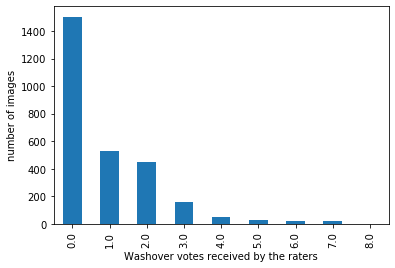

In [39]:
#plot it up
ax = joinedWash['wash_votes'].value_counts().sort_index().plot.bar()
ax.set_xlabel("Washover votes received by the raters")
ax.set_ylabel("number of images")

## Now we can go back to splitting the washover data based on votes:

In [40]:
washTally = joinedWash
washTally.head()

,Full_Image,wash_votes,Filename
0,barry/20190716a_jpgs/C19748971.jpg,1.0,Barry/20190716a_jpgs/jpgs/C19748971.jpg
1,barry/20190716a_jpgs/P19746920.jpg,1.0,Barry/20190716a_jpgs/jpgs/P19746920.jpg
2,barry/20190716a_jpgs/P19746926.jpg,1.0,Barry/20190716a_jpgs/jpgs/P19746926.jpg
3,barry/20190716a_jpgs/P19746929.jpg,1.0,Barry/20190716a_jpgs/jpgs/P19746929.jpg
4,barry/20190716a_jpgs/P19746935.jpg,1.0,Barry/20190716a_jpgs/jpgs/P19746935.jpg


In [41]:
#add the path
washTally['Image_Path'] = '/data/NOAA_ERI/' + washTally['Filename']
washTally.head()

,Full_Image,wash_votes,Filename,Image_Path
0,barry/20190716a_jpgs/C19748971.jpg,1.0,Barry/20190716a_jpgs/jpgs/C19748971.jpg,/data/NOAA_ERI/Barry/20190716a_jpgs/jpgs/C1974...
1,barry/20190716a_jpgs/P19746920.jpg,1.0,Barry/20190716a_jpgs/jpgs/P19746920.jpg,/data/NOAA_ERI/Barry/20190716a_jpgs/jpgs/P1974...
2,barry/20190716a_jpgs/P19746926.jpg,1.0,Barry/20190716a_jpgs/jpgs/P19746926.jpg,/data/NOAA_ERI/Barry/20190716a_jpgs/jpgs/P1974...
3,barry/20190716a_jpgs/P19746929.jpg,1.0,Barry/20190716a_jpgs/jpgs/P19746929.jpg,/data/NOAA_ERI/Barry/20190716a_jpgs/jpgs/P1974...
4,barry/20190716a_jpgs/P19746935.jpg,1.0,Barry/20190716a_jpgs/jpgs/P19746935.jpg,/data/NOAA_ERI/Barry/20190716a_jpgs/jpgs/P1974...


In [42]:
#if image has 1 or more vote for washover, it is a washover

MaxVote = int(washTally['wash_votes'].max() +1)

for i in range(0,MaxVote):
    #pull out the list from the df
    Tally = washTally[washTally['wash_votes'] == i]
    TallyList = Tally['Image_Path'].tolist()
    if i == 0:
        TallyFolder = '../data/pics/labelertoModel/AllRoundsSix/nowash'
    else:
        TallyFolder = '../data/pics/labelertoModel/AllRoundsSix/wash'
    print(TallyFolder)
    #move those on the list
    for f in TallyList:
        #print(f)
        shutil.copy(f, TallyFolder)

../data/pics/labelertoModel/AllRoundsSix/nowash
/data/NOAA_ERI/Barry/20190716a_jpgs/jpgs/P19747001.jpg
/data/NOAA_ERI/Barry/20190716a_jpgs/jpgs/P19747149.jpg
/data/NOAA_ERI/Barry/20190716a_jpgs/jpgs/P19747236.jpg
/data/NOAA_ERI/Barry/20190716a_jpgs/jpgs/P19747269.jpg
/data/NOAA_ERI/Barry/20190716a_jpgs/jpgs/P19747441.jpg
/data/NOAA_ERI/Barry/20190716a_jpgs/jpgs/P19747667.jpg
/data/NOAA_ERI/Barry/20190716a_jpgs/jpgs/P19747947.jpg
/data/NOAA_ERI/Barry/20190716a_jpgs/jpgs/P19748612.jpg
/data/NOAA_ERI/Barry/20190716a_jpgs/jpgs/P19749387.jpg
/data/NOAA_ERI/Barry/20190716a_jpgs/jpgs/P19749390.jpg
/data/NOAA_ERI/Barry/20190716a_jpgs/jpgs/P19751672.jpg
/data/NOAA_ERI/Barry/20190716a_jpgs/jpgs/P19751675.jpg
/data/NOAA_ERI/Barry/20190716a_jpgs/jpgs/P19755502.jpg
/data/NOAA_ERI/Barry/20190716a_jpgs/jpgs/P19755637.jpg
/data/NOAA_ERI/Barry/20190716a_jpgs/jpgs/S19749077.jpg
/data/NOAA_ERI/Barry/20190716a_jpgs/jpgs/S19749080.jpg
/data/NOAA_ERI/Barry/20190716a_jpgs/jpgs/S19749086.jpg
/data/NOAA_ERI/Ba

/data/NOAA_ERI/Delta/20201010c_jpgs/jpgs/P28477215.jpg
/data/NOAA_ERI/Delta/20201010c_jpgs/jpgs/P28477275.jpg
/data/NOAA_ERI/Delta/20201010c_jpgs/jpgs/P28478012.jpg
/data/NOAA_ERI/Delta/20201010c_jpgs/jpgs/S28475677.jpg
/data/NOAA_ERI/Delta/20201010c_jpgs/jpgs/S28478759.jpg
/data/NOAA_ERI/Delta/20201011a_jpgs/jpgs/C28570446.jpg
/data/NOAA_ERI/Delta/20201011a_jpgs/jpgs/C28570546.jpg
/data/NOAA_ERI/Delta/20201011a_jpgs/jpgs/C28571275.jpg
/data/NOAA_ERI/Delta/20201011a_jpgs/jpgs/C28574110.jpg
/data/NOAA_ERI/Delta/20201011a_jpgs/jpgs/P28570237.jpg
/data/NOAA_ERI/Delta/20201011a_jpgs/jpgs/P28570300.jpg
/data/NOAA_ERI/Delta/20201011a_jpgs/jpgs/P28570448.jpg
/data/NOAA_ERI/Delta/20201011a_jpgs/jpgs/P28570550.jpg
/data/NOAA_ERI/Delta/20201011a_jpgs/jpgs/P28571102.jpg
/data/NOAA_ERI/Delta/20201011a_jpgs/jpgs/P28571497.jpg
/data/NOAA_ERI/Delta/20201011a_jpgs/jpgs/P28571936.jpg
/data/NOAA_ERI/Delta/20201011a_jpgs/jpgs/P28572157.jpg
/data/NOAA_ERI/Delta/20201011a_jpgs/jpgs/P28572161.jpg
/data/NOAA

/data/NOAA_ERI/Florence/20180917a_jpgs/jpgs/P26055408.jpg
/data/NOAA_ERI/Florence/20180917a_jpgs/jpgs/P26055411.jpg
/data/NOAA_ERI/Florence/20180917a_jpgs/jpgs/P26055414.jpg
/data/NOAA_ERI/Florence/20180917a_jpgs/jpgs/P26055417.jpg
/data/NOAA_ERI/Florence/20180917a_jpgs/jpgs/P26055429.jpg
/data/NOAA_ERI/Florence/20180917a_jpgs/jpgs/P26055432.jpg
/data/NOAA_ERI/Florence/20180917a_jpgs/jpgs/P26055595.jpg
/data/NOAA_ERI/Florence/20180917a_jpgs/jpgs/P26055601.jpg
/data/NOAA_ERI/Florence/20180917a_jpgs/jpgs/P26055613.jpg
/data/NOAA_ERI/Florence/20180917a_jpgs/jpgs/P26055631.jpg
/data/NOAA_ERI/Florence/20180917a_jpgs/jpgs/P26055634.jpg
/data/NOAA_ERI/Florence/20180917a_jpgs/jpgs/P26055649.jpg
/data/NOAA_ERI/Florence/20180917a_jpgs/jpgs/P26055676.jpg
/data/NOAA_ERI/Florence/20180917a_jpgs/jpgs/P26056000.jpg
/data/NOAA_ERI/Florence/20180917a_jpgs/jpgs/P26056003.jpg
/data/NOAA_ERI/Florence/20180917a_jpgs/jpgs/P26056018.jpg
/data/NOAA_ERI/Florence/20180917a_jpgs/jpgs/P26056027.jpg
/data/NOAA_ERI

/data/NOAA_ERI/Isaias/20200804a_jpgs/jpgs/C21768037.jpg
/data/NOAA_ERI/Isaias/20200804a_jpgs/jpgs/C21772625.jpg
/data/NOAA_ERI/Isaias/20200804a_jpgs/jpgs/C21772656.jpg
/data/NOAA_ERI/Isaias/20200804a_jpgs/jpgs/C21776405.jpg
/data/NOAA_ERI/Isaias/20200804a_jpgs/jpgs/C21776408.jpg
/data/NOAA_ERI/Isaias/20200804a_jpgs/jpgs/C21776426.jpg
/data/NOAA_ERI/Isaias/20200804a_jpgs/jpgs/C21776606.jpg
/data/NOAA_ERI/Isaias/20200804a_jpgs/jpgs/C21776652.jpg
/data/NOAA_ERI/Isaias/20200804a_jpgs/jpgs/C21777007.jpg
/data/NOAA_ERI/Isaias/20200804a_jpgs/jpgs/P21767857.jpg
/data/NOAA_ERI/Isaias/20200804a_jpgs/jpgs/P21767874.jpg
/data/NOAA_ERI/Isaias/20200804a_jpgs/jpgs/P21767882.jpg
/data/NOAA_ERI/Isaias/20200804a_jpgs/jpgs/P21767885.jpg
/data/NOAA_ERI/Isaias/20200804a_jpgs/jpgs/P21767889.jpg
/data/NOAA_ERI/Isaias/20200804a_jpgs/jpgs/P21767906.jpg
/data/NOAA_ERI/Isaias/20200804a_jpgs/jpgs/P21767910.jpg
/data/NOAA_ERI/Isaias/20200804a_jpgs/jpgs/P21767913.jpg
/data/NOAA_ERI/Isaias/20200804a_jpgs/jpgs/P21767

/data/NOAA_ERI/Isaias/20200804a_jpgs/jpgs/S21771498.jpg
/data/NOAA_ERI/Isaias/20200804a_jpgs/jpgs/S21771501.jpg
/data/NOAA_ERI/Isaias/20200804a_jpgs/jpgs/S21771794.jpg
/data/NOAA_ERI/Isaias/20200804a_jpgs/jpgs/S21771797.jpg
/data/NOAA_ERI/Isaias/20200804a_jpgs/jpgs/S21771826.jpg
/data/NOAA_ERI/Isaias/20200804a_jpgs/jpgs/S21771833.jpg
/data/NOAA_ERI/Isaias/20200804a_jpgs/jpgs/S21771836.jpg
/data/NOAA_ERI/Isaias/20200804a_jpgs/jpgs/S21771875.jpg
/data/NOAA_ERI/Isaias/20200804a_jpgs/jpgs/S21771882.jpg
/data/NOAA_ERI/Isaias/20200804a_jpgs/jpgs/S21771900.jpg
/data/NOAA_ERI/Isaias/20200804a_jpgs/jpgs/S21771917.jpg
/data/NOAA_ERI/Isaias/20200804a_jpgs/jpgs/S21771960.jpg
/data/NOAA_ERI/Isaias/20200804a_jpgs/jpgs/S21772421.jpg
/data/NOAA_ERI/Isaias/20200804a_jpgs/jpgs/S21772481.jpg
/data/NOAA_ERI/Isaias/20200804a_jpgs/jpgs/S21772657.jpg
/data/NOAA_ERI/Isaias/20200804a_jpgs/jpgs/S21772664.jpg
/data/NOAA_ERI/Isaias/20200804a_jpgs/jpgs/S21772671.jpg
/data/NOAA_ERI/Isaias/20200804a_jpgs/jpgs/S21772

/data/NOAA_ERI/Laura/20200829b_jpgs/jpgs/P24261717.jpg
/data/NOAA_ERI/Laura/20200829b_jpgs/jpgs/P24261732.jpg
/data/NOAA_ERI/Laura/20200830a_jpgs/jpgs/C24353590.jpg
/data/NOAA_ERI/Laura/20200830a_jpgs/jpgs/P24353566.jpg
/data/NOAA_ERI/Laura/20200830a_jpgs/jpgs/P24353581.jpg
/data/NOAA_ERI/Laura/20200830a_jpgs/jpgs/P24354361.jpg
/data/NOAA_ERI/Laura/20200830a_jpgs/jpgs/P24354382.jpg
/data/NOAA_ERI/Laura/20200830a_jpgs/jpgs/P24354388.jpg
/data/NOAA_ERI/Laura/20200830a_jpgs/jpgs/P24354526.jpg
/data/NOAA_ERI/Laura/20200830a_jpgs/jpgs/P24355008.jpg
/data/NOAA_ERI/Laura/20200830a_jpgs/jpgs/S24353573.jpg
/data/NOAA_ERI/Laura/20200830a_jpgs/jpgs/S24353681.jpg
/data/NOAA_ERI/Laura/20200830a_jpgs/jpgs/S24354314.jpg
/data/NOAA_ERI/Laura/20200830a_jpgs/jpgs/S24354317.jpg
/data/NOAA_ERI/Laura/20200830a_jpgs/jpgs/S24354365.jpg
/data/NOAA_ERI/Laura/20200830a_jpgs/jpgs/S24354407.jpg
/data/NOAA_ERI/Laura/20200830a_jpgs/jpgs/S24354416.jpg
/data/NOAA_ERI/Laura/20200830a_jpgs/jpgs/S24354443.jpg
/data/NOAA

/data/NOAA_ERI/Michael/20181011a_jpgs/jpgs/P28466747.jpg
/data/NOAA_ERI/Michael/20181011a_jpgs/jpgs/P28466753.jpg
/data/NOAA_ERI/Michael/20181011a_jpgs/jpgs/P28466813.jpg
/data/NOAA_ERI/Michael/20181011a_jpgs/jpgs/P28466843.jpg
/data/NOAA_ERI/Michael/20181011a_jpgs/jpgs/P28466849.jpg
/data/NOAA_ERI/Michael/20181011a_jpgs/jpgs/P28466855.jpg
/data/NOAA_ERI/Michael/20181011a_jpgs/jpgs/P28466891.jpg
/data/NOAA_ERI/Michael/20181011a_jpgs/jpgs/P28466897.jpg
/data/NOAA_ERI/Michael/20181011a_jpgs/jpgs/P28466951.jpg
/data/NOAA_ERI/Michael/20181011a_jpgs/jpgs/P28467023.jpg
/data/NOAA_ERI/Michael/20181011a_jpgs/jpgs/P28467047.jpg
/data/NOAA_ERI/Michael/20181011a_jpgs/jpgs/P28467113.jpg
/data/NOAA_ERI/Michael/20181011a_jpgs/jpgs/P28467374.jpg
/data/NOAA_ERI/Michael/20181011a_jpgs/jpgs/P28467380.jpg
/data/NOAA_ERI/Michael/20181011a_jpgs/jpgs/P28467386.jpg
/data/NOAA_ERI/Michael/20181011a_jpgs/jpgs/P28467392.jpg
/data/NOAA_ERI/Michael/20181011a_jpgs/jpgs/P28467404.jpg
/data/NOAA_ERI/Michael/20181011

/data/NOAA_ERI/Michael/20181011a_jpgs/jpgs/S28466574.jpg
/data/NOAA_ERI/Michael/20181011a_jpgs/jpgs/S28466640.jpg
/data/NOAA_ERI/Michael/20181011a_jpgs/jpgs/S28466688.jpg
/data/NOAA_ERI/Michael/20181011a_jpgs/jpgs/S28466748.jpg
/data/NOAA_ERI/Michael/20181011a_jpgs/jpgs/S28466754.jpg
/data/NOAA_ERI/Michael/20181011a_jpgs/jpgs/S28466760.jpg
/data/NOAA_ERI/Michael/20181011a_jpgs/jpgs/S28466778.jpg
/data/NOAA_ERI/Michael/20181011a_jpgs/jpgs/S28466826.jpg
/data/NOAA_ERI/Michael/20181011a_jpgs/jpgs/S28466832.jpg
/data/NOAA_ERI/Michael/20181011a_jpgs/jpgs/S28466838.jpg
/data/NOAA_ERI/Michael/20181011a_jpgs/jpgs/S28466844.jpg
/data/NOAA_ERI/Michael/20181011a_jpgs/jpgs/S28466862.jpg
/data/NOAA_ERI/Michael/20181011a_jpgs/jpgs/S28466868.jpg
/data/NOAA_ERI/Michael/20181011a_jpgs/jpgs/S28466874.jpg
/data/NOAA_ERI/Michael/20181011a_jpgs/jpgs/S28466880.jpg
/data/NOAA_ERI/Michael/20181011a_jpgs/jpgs/S28466899.jpg
/data/NOAA_ERI/Michael/20181011a_jpgs/jpgs/S28466905.jpg
/data/NOAA_ERI/Michael/20181011

/data/NOAA_ERI/Sally/20200918c_jpgs/jpgs/C26282618.jpg
/data/NOAA_ERI/Sally/20200918c_jpgs/jpgs/C26282659.jpg
/data/NOAA_ERI/Sally/20200918d_jpgs/jpgs/R26279244.jpg
/data/NOAA_ERI/Sally/20200918d_jpgs/jpgs/R26279289.jpg
/data/NOAA_ERI/Sally/20200918d_jpgs/jpgs/R26279296.jpg
/data/NOAA_ERI/Sally/20200918d_jpgs/jpgs/R26279302.jpg
/data/NOAA_ERI/Sally/20200918d_jpgs/jpgs/R26279309.jpg
/data/NOAA_ERI/Sally/20200918d_jpgs/jpgs/R26279315.jpg
/data/NOAA_ERI/Sally/20200918d_jpgs/jpgs/R26279448.jpg
/data/NOAA_ERI/Sally/20200918d_jpgs/jpgs/R26279454.jpg
/data/NOAA_ERI/Sally/20200918d_jpgs/jpgs/R26279461.jpg
/data/NOAA_ERI/Sally/20200918d_jpgs/jpgs/R26281510.jpg
/data/NOAA_ERI/Sally/20200918d_jpgs/jpgs/R26281902.jpg
/data/NOAA_ERI/Sally/20200918d_jpgs/jpgs/R26282192.jpg
/data/NOAA_ERI/Sally/20200918d_jpgs/jpgs/R26282202.jpg
/data/NOAA_ERI/Sally/20200918d_jpgs/jpgs/R26282285.jpg
/data/NOAA_ERI/Sally/20200918d_jpgs/jpgs/R26282295.jpg
/data/NOAA_ERI/Sally/20200918d_jpgs/jpgs/R26282305.jpg
/data/NOAA

/data/NOAA_ERI/Zeta/20201030b_jpgs/jpgs/S30482337.jpg
/data/NOAA_ERI/Zeta/20201030b_jpgs/jpgs/S30482915.jpg
/data/NOAA_ERI/Zeta/20201030b_jpgs/jpgs/S30482933.jpg
../data/pics/labelertoModel/AllRoundsSix/wash
/data/NOAA_ERI/Barry/20190716a_jpgs/jpgs/C19748971.jpg
/data/NOAA_ERI/Barry/20190716a_jpgs/jpgs/P19746920.jpg
/data/NOAA_ERI/Barry/20190716a_jpgs/jpgs/P19746926.jpg
/data/NOAA_ERI/Barry/20190716a_jpgs/jpgs/P19746929.jpg
/data/NOAA_ERI/Barry/20190716a_jpgs/jpgs/P19746935.jpg
/data/NOAA_ERI/Barry/20190716a_jpgs/jpgs/P19746941.jpg
/data/NOAA_ERI/Barry/20190716a_jpgs/jpgs/P19746944.jpg
/data/NOAA_ERI/Barry/20190716a_jpgs/jpgs/P19747007.jpg
/data/NOAA_ERI/Barry/20190716a_jpgs/jpgs/P19747074.jpg
/data/NOAA_ERI/Barry/20190716a_jpgs/jpgs/P19747372.jpg
/data/NOAA_ERI/Barry/20190716a_jpgs/jpgs/P19747450.jpg
/data/NOAA_ERI/Barry/20190716a_jpgs/jpgs/P19747474.jpg
/data/NOAA_ERI/Barry/20190716a_jpgs/jpgs/P19747522.jpg
/data/NOAA_ERI/Barry/20190716a_jpgs/jpgs/P19747525.jpg
/data/NOAA_ERI/Barry/2

/data/NOAA_ERI/Florence/20180917a_jpgs/jpgs/P26057327.jpg
/data/NOAA_ERI/Florence/20180917a_jpgs/jpgs/P26057330.jpg
/data/NOAA_ERI/Florence/20180917a_jpgs/jpgs/P26057355.jpg
/data/NOAA_ERI/Florence/20180917a_jpgs/jpgs/P26057361.jpg
/data/NOAA_ERI/Florence/20180917a_jpgs/jpgs/P26057376.jpg
/data/NOAA_ERI/Florence/20180917a_jpgs/jpgs/P26057400.jpg
/data/NOAA_ERI/Florence/20180917a_jpgs/jpgs/P26057412.jpg
/data/NOAA_ERI/Florence/20180917a_jpgs/jpgs/P26057521.jpg
/data/NOAA_ERI/Florence/20180917a_jpgs/jpgs/P26057638.jpg
/data/NOAA_ERI/Florence/20180917a_jpgs/jpgs/P26057662.jpg
/data/NOAA_ERI/Florence/20180917a_jpgs/jpgs/P26058082.jpg
/data/NOAA_ERI/Florence/20180917a_jpgs/jpgs/P26058342.jpg
/data/NOAA_ERI/Florence/20180917a_jpgs/jpgs/P26058728.jpg
/data/NOAA_ERI/Florence/20180917a_jpgs/jpgs/P26058749.jpg
/data/NOAA_ERI/Florence/20180917a_jpgs/jpgs/P26058945.jpg
/data/NOAA_ERI/Florence/20180917a_jpgs/jpgs/P26059021.jpg
/data/NOAA_ERI/Florence/20180917a_jpgs/jpgs/P26059262.jpg
/data/NOAA_ERI

/data/NOAA_ERI/Isaias/20200804a_jpgs/jpgs/S21774131.jpg
/data/NOAA_ERI/Isaias/20200804a_jpgs/jpgs/S21774188.jpg
/data/NOAA_ERI/Isaias/20200804a_jpgs/jpgs/S21774195.jpg
/data/NOAA_ERI/Isaias/20200804a_jpgs/jpgs/S21774198.jpg
/data/NOAA_ERI/Isaias/20200804a_jpgs/jpgs/S21774293.jpg
/data/NOAA_ERI/Isaias/20200804a_jpgs/jpgs/S21774332.jpg
/data/NOAA_ERI/Isaias/20200804a_jpgs/jpgs/S21774558.jpg
/data/NOAA_ERI/Isaias/20200804a_jpgs/jpgs/S21774720.jpg
/data/NOAA_ERI/Isaias/20200804a_jpgs/jpgs/S21774886.jpg
/data/NOAA_ERI/Isaias/20200804a_jpgs/jpgs/S21774889.jpg
/data/NOAA_ERI/Isaias/20200804a_jpgs/jpgs/S21774903.jpg
/data/NOAA_ERI/Isaias/20200804a_jpgs/jpgs/S21775147.jpg
/data/NOAA_ERI/Isaias/20200804a_jpgs/jpgs/S21775603.jpg
/data/NOAA_ERI/Isaias/20200804a_jpgs/jpgs/S21775687.jpg
/data/NOAA_ERI/Isaias/20200804a_jpgs/jpgs/S21775694.jpg
/data/NOAA_ERI/Isaias/20200804a_jpgs/jpgs/S21775716.jpg
/data/NOAA_ERI/Isaias/20200804a_jpgs/jpgs/S21775747.jpg
/data/NOAA_ERI/Isaias/20200804a_jpgs/jpgs/S21775

/data/NOAA_ERI/Zeta/20201029a_jpgs/jpgs/P30358493.jpg
/data/NOAA_ERI/Zeta/20201029a_jpgs/jpgs/P30358533.jpg
/data/NOAA_ERI/Zeta/20201029b_jpgs/jpgs/S30359555.jpg
/data/NOAA_ERI/Zeta/20201029b_jpgs/jpgs/S30361177.jpg
/data/NOAA_ERI/Zeta/20201029c_jpgs/jpgs/C30373275.jpg
/data/NOAA_ERI/Zeta/20201029c_jpgs/jpgs/C30374779.jpg
/data/NOAA_ERI/Zeta/20201029c_jpgs/jpgs/C30378877.jpg
/data/NOAA_ERI/Zeta/20201029c_jpgs/jpgs/C30379989.jpg
/data/NOAA_ERI/Zeta/20201029c_jpgs/jpgs/C30380556.jpg
/data/NOAA_ERI/Zeta/20201029c_jpgs/jpgs/P30378905.jpg
/data/NOAA_ERI/Zeta/20201029c_jpgs/jpgs/P30380266.jpg
/data/NOAA_ERI/Zeta/20201029c_jpgs/jpgs/S30378900.jpg
/data/NOAA_ERI/Zeta/20201029c_jpgs/jpgs/S30378921.jpg
/data/NOAA_ERI/Zeta/20201030b_jpgs/jpgs/C30480700.jpg
/data/NOAA_ERI/Zeta/20201030b_jpgs/jpgs/C30481880.jpg
/data/NOAA_ERI/Zeta/20201030b_jpgs/jpgs/C30481952.jpg
/data/NOAA_ERI/Zeta/20201030b_jpgs/jpgs/C30482069.jpg
/data/NOAA_ERI/Zeta/20201030b_jpgs/jpgs/C30482087.jpg
/data/NOAA_ERI/Zeta/20201030

/data/NOAA_ERI/Florence/20180917a_jpgs/jpgs/P26059859.jpg
/data/NOAA_ERI/Florence/20180917a_jpgs/jpgs/P26059865.jpg
/data/NOAA_ERI/Florence/20180917a_jpgs/jpgs/P26059868.jpg
/data/NOAA_ERI/Florence/20180917a_jpgs/jpgs/P26059922.jpg
/data/NOAA_ERI/Florence/20180917a_jpgs/jpgs/P26059925.jpg
/data/NOAA_ERI/Florence/20180917a_jpgs/jpgs/P26059938.jpg
/data/NOAA_ERI/Florence/20180917a_jpgs/jpgs/P26059977.jpg
/data/NOAA_ERI/Florence/20180917a_jpgs/jpgs/P26059983.jpg
/data/NOAA_ERI/Florence/20180917a_jpgs/jpgs/P26060001.jpg
/data/NOAA_ERI/Florence/20180917a_jpgs/jpgs/P26060040.jpg
/data/NOAA_ERI/Florence/20180917a_jpgs/jpgs/P26060070.jpg
/data/NOAA_ERI/Florence/20180917a_jpgs/jpgs/P26060077.jpg
/data/NOAA_ERI/Florence/20180917a_jpgs/jpgs/P26060101.jpg
/data/NOAA_ERI/Florence/20180917a_jpgs/jpgs/P26060161.jpg
/data/NOAA_ERI/Florence/20180917a_jpgs/jpgs/P26060257.jpg
/data/NOAA_ERI/Florence/20180917a_jpgs/jpgs/P26060260.jpg
/data/NOAA_ERI/Florence/20180917a_jpgs/jpgs/P26060269.jpg
/data/NOAA_ERI

/data/NOAA_ERI/Michael/20181011a_jpgs/jpgs/P28462280.jpg
/data/NOAA_ERI/Michael/20181011a_jpgs/jpgs/P28462350.jpg
/data/NOAA_ERI/Michael/20181011a_jpgs/jpgs/P28462360.jpg
/data/NOAA_ERI/Michael/20181011a_jpgs/jpgs/P28462370.jpg
/data/NOAA_ERI/Michael/20181011a_jpgs/jpgs/P28462390.jpg
/data/NOAA_ERI/Michael/20181011a_jpgs/jpgs/P28462400.jpg
/data/NOAA_ERI/Michael/20181011a_jpgs/jpgs/P28462431.jpg
/data/NOAA_ERI/Michael/20181011a_jpgs/jpgs/P28462441.jpg
/data/NOAA_ERI/Michael/20181011a_jpgs/jpgs/P28462471.jpg
/data/NOAA_ERI/Michael/20181011a_jpgs/jpgs/P28462481.jpg
/data/NOAA_ERI/Michael/20181011a_jpgs/jpgs/P28462501.jpg
/data/NOAA_ERI/Michael/20181011a_jpgs/jpgs/P28462511.jpg
/data/NOAA_ERI/Michael/20181011a_jpgs/jpgs/P28462521.jpg
/data/NOAA_ERI/Michael/20181011a_jpgs/jpgs/P28462531.jpg
/data/NOAA_ERI/Michael/20181011a_jpgs/jpgs/P28462571.jpg
/data/NOAA_ERI/Michael/20181011a_jpgs/jpgs/P28462611.jpg
/data/NOAA_ERI/Michael/20181011a_jpgs/jpgs/P28462621.jpg
/data/NOAA_ERI/Michael/20181011

/data/NOAA_ERI/Florence/20180917a_jpgs/jpgs/P26057240.jpg
/data/NOAA_ERI/Florence/20180917a_jpgs/jpgs/P26057294.jpg
/data/NOAA_ERI/Florence/20180917a_jpgs/jpgs/P26057382.jpg
/data/NOAA_ERI/Florence/20180917a_jpgs/jpgs/P26057388.jpg
/data/NOAA_ERI/Florence/20180917a_jpgs/jpgs/P26057427.jpg
/data/NOAA_ERI/Florence/20180917a_jpgs/jpgs/P26057469.jpg
/data/NOAA_ERI/Florence/20180917a_jpgs/jpgs/P26057472.jpg
/data/NOAA_ERI/Florence/20180917a_jpgs/jpgs/P26057490.jpg
/data/NOAA_ERI/Florence/20180917a_jpgs/jpgs/P26057493.jpg
/data/NOAA_ERI/Florence/20180917a_jpgs/jpgs/P26057506.jpg
/data/NOAA_ERI/Florence/20180917a_jpgs/jpgs/P26057527.jpg
/data/NOAA_ERI/Florence/20180917a_jpgs/jpgs/P26057641.jpg
/data/NOAA_ERI/Florence/20180917a_jpgs/jpgs/P26057690.jpg
/data/NOAA_ERI/Florence/20180917a_jpgs/jpgs/P26057717.jpg
/data/NOAA_ERI/Florence/20180917a_jpgs/jpgs/P26057980.jpg
/data/NOAA_ERI/Florence/20180917a_jpgs/jpgs/P26058019.jpg
/data/NOAA_ERI/Florence/20180917a_jpgs/jpgs/P26058022.jpg
/data/NOAA_ERI

/data/NOAA_ERI/Florence/20180917a_jpgs/jpgs/P26057210.jpg
/data/NOAA_ERI/Florence/20180917a_jpgs/jpgs/P26057367.jpg
/data/NOAA_ERI/Florence/20180917a_jpgs/jpgs/P26057518.jpg
/data/NOAA_ERI/Florence/20180917a_jpgs/jpgs/P26057599.jpg
/data/NOAA_ERI/Florence/20180917a_jpgs/jpgs/P26057720.jpg
/data/NOAA_ERI/Florence/20180917a_jpgs/jpgs/P26059853.jpg
/data/NOAA_ERI/Isaias/20200804a_jpgs/jpgs/S21766818.jpg
/data/NOAA_ERI/Isaias/20200804a_jpgs/jpgs/S21766832.jpg
/data/NOAA_ERI/Isaias/20200804a_jpgs/jpgs/S21767886.jpg
/data/NOAA_ERI/Isaias/20200804a_jpgs/jpgs/S21769783.jpg
/data/NOAA_ERI/Isaias/20200804a_jpgs/jpgs/S21770121.jpg
/data/NOAA_ERI/Isaias/20200804a_jpgs/jpgs/S21771112.jpg
/data/NOAA_ERI/Isaias/20200804a_jpgs/jpgs/S21773063.jpg
/data/NOAA_ERI/Isaias/20200804a_jpgs/jpgs/S21773070.jpg
/data/NOAA_ERI/Isaias/20200804a_jpgs/jpgs/S21775111.jpg
/data/NOAA_ERI/Michael/20181011a_jpgs/jpgs/P28462791.jpg
../data/pics/labelertoModel/AllRoundsSix/wash
/data/NOAA_ERI/Florence/20180917a_jpgs/jpgs/P

In [ ]:
#sned original florence images to those directories